# Recurrent Neural Network - LSTM

In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt

### Base de dados

In [2]:
data = quandl.get("EIA/PET_RWTC_D", start_date="2015-01-01", end_date="2020-07-01", index_col='Date')


In [3]:
data.describe()

,Value
count,1399.000000
mean,51.473931
std,11.176120
min,-36.980000
25%,45.890000
50%,51.630000
75%,58.540000
max,77.410000


In [4]:
data.tail()

,Value
Date,
2020-06-25,38.66
2020-06-26,38.53
2020-06-29,39.67
2020-06-30,39.27
2020-07-01,39.88


In [5]:
# função gráfico
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=600):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

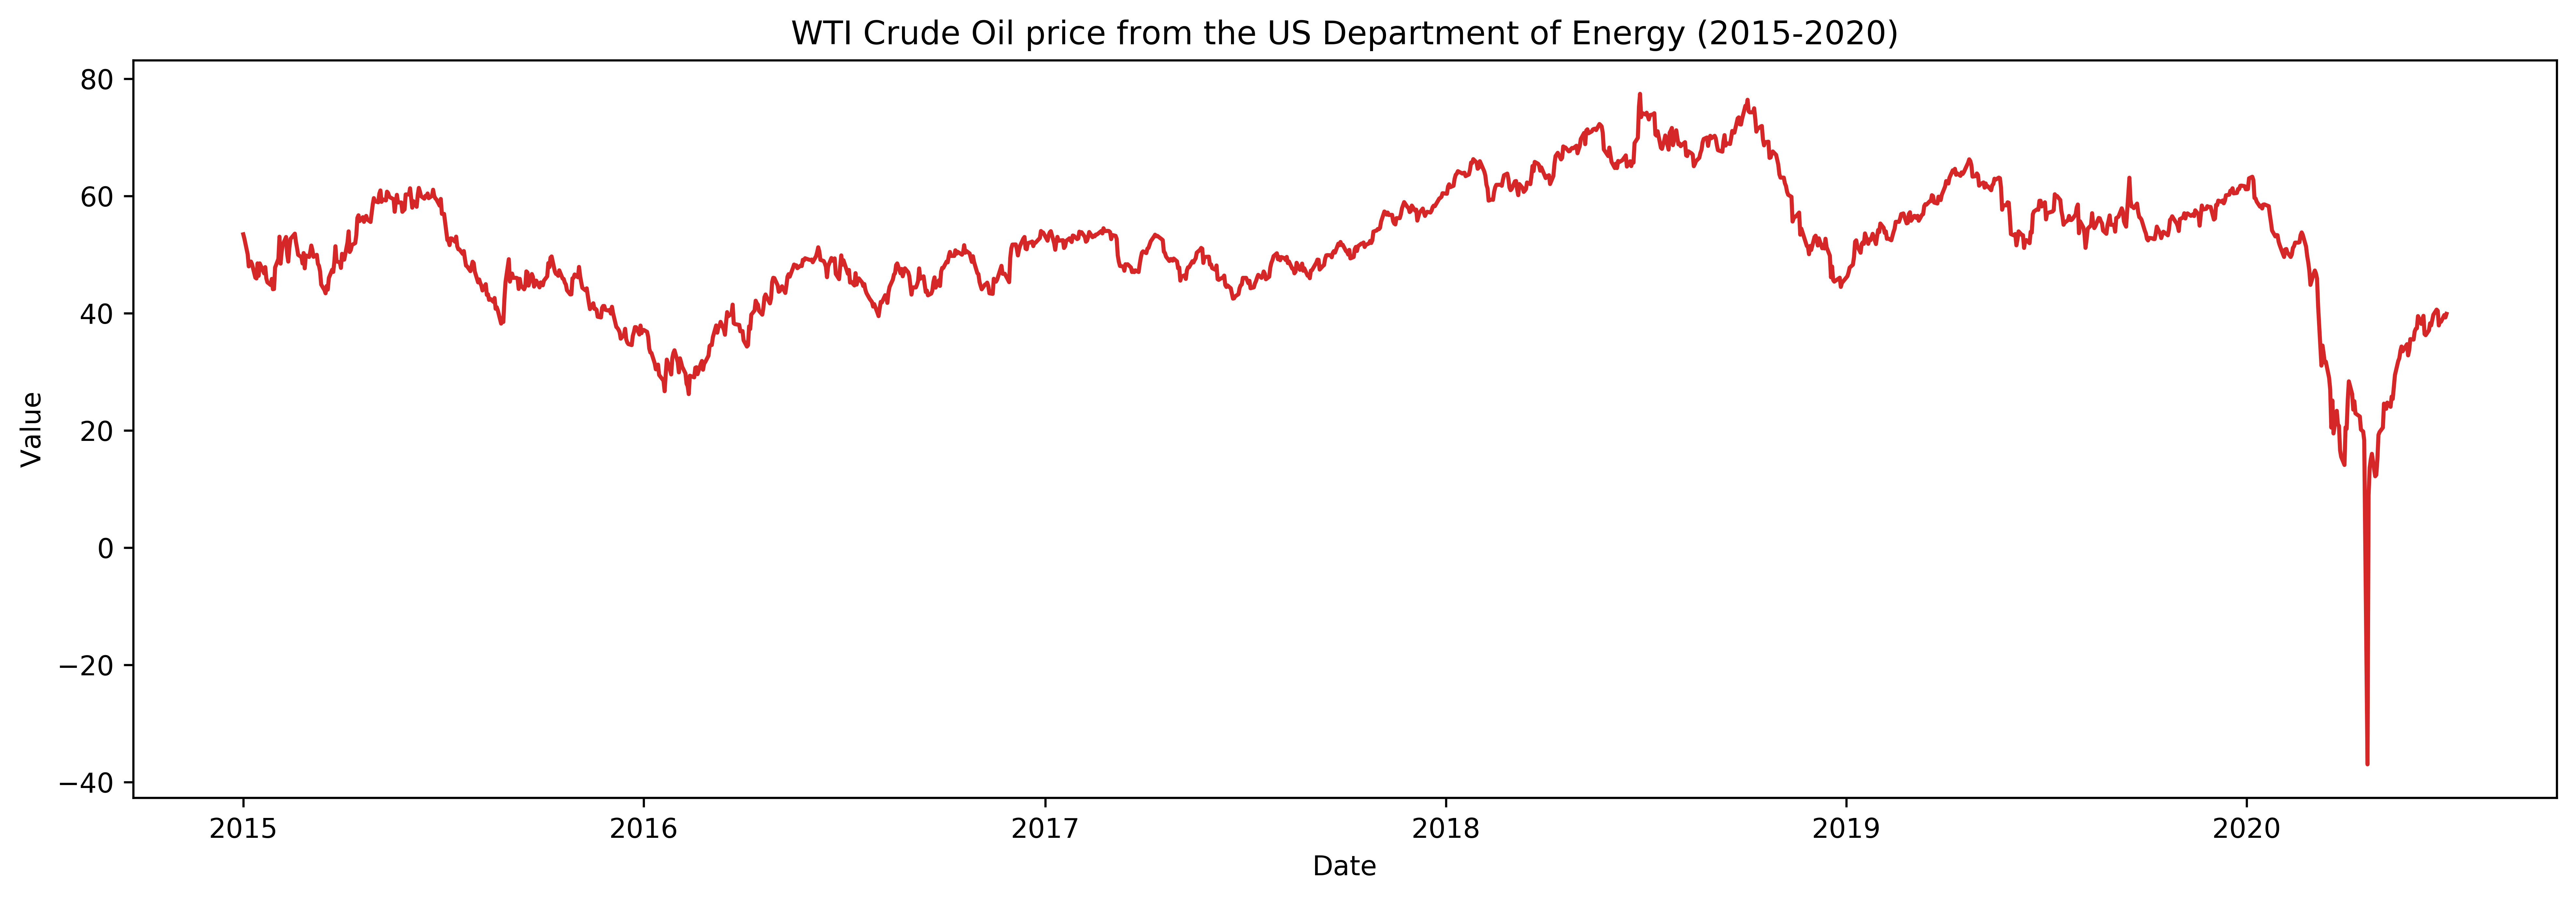

In [19]:
plot_df(data, x=data.index, y=data.Value, title='WTI Crude Oil price from the US Department of Energy (2015-2020)')  


### Divisão em Treino e teste

In [6]:
train = data[:1050]  #75%
test = data[1050:]   #25%

In [7]:
train.tail()

,Value
Date,
2019-02-13,53.84
2019-02-14,54.40
2019-02-15,55.58
2019-02-18,55.58
2019-02-19,56.12


In [8]:
test.tail()

,Value
Date,
2020-06-25,38.66
2020-06-26,38.53
2020-06-29,39.67
2020-06-30,39.27
2020-07-01,39.88


### Normalização

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

In [10]:
train_scaled

array([[0.53221398],
       [0.51796173],
       [0.46583366],
       ...,
       [0.5737993 ],
       [0.5737993 ],
       [0.58434205]])

### Criar a estrutura de dados com janela 10 e output 1

In [11]:
window = 10
trainSize = len(train_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(train_scaled[i-window:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [12]:
X_train.shape

(1040, 10)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train.shape

(1040, 10, 1)

### Construindo a RNN

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Construção da rede

In [16]:
# Initicializar a RNN
regressor = Sequential()
 
# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 80)            57920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

### Treinamento

In [34]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
1040/1040 [==============================] - 1s 691us/step - loss: 0.0013
Epoch 2/200
1040/1040 [==============================] - 1s 683us/step - loss: 0.0013
Epoch 3/200
1040/1040 [==============================] - 1s 673us/step - loss: 0.0013
Epoch 4/200
1040/1040 [==============================] - 1s 674us/step - loss: 0.0013
Epoch 5/200
1040/1040 [==============================] - 1s 677us/step - loss: 0.0012
Epoch 6/200
1040/1040 [==============================] - 1s 682us/step - loss: 0.0014
Epoch 7/200
1040/1040 [==============================] - 1s 671us/step - loss: 0.0014
Epoch 8/200
1040/1040 [==============================] - 1s 683us/step - loss: 0.0014
Epoch 9/200
1040/1040 [==============================] - 1s 687us/step - loss: 0.0013
Epoch 10/200
1040/1040 [==============================] - 1s 761us/step - loss: 0.0012
Epoch 11/200
1040/1040 [==============================] - 1s 733us/step - loss: 0.0013
Epoch 12/200
1040/1040 [============================

1040/1040 [==============================] - 1s 663us/step - loss: 0.0010
Epoch 94/200
1040/1040 [==============================] - 1s 679us/step - loss: 0.0010
Epoch 95/200
1040/1040 [==============================] - 1s 720us/step - loss: 9.0817e-04
Epoch 96/200
1040/1040 [==============================] - 1s 669us/step - loss: 9.3467e-04
Epoch 97/200
1040/1040 [==============================] - 1s 690us/step - loss: 9.0533e-04
Epoch 98/200
1040/1040 [==============================] - 1s 685us/step - loss: 9.3846e-04
Epoch 99/200
1040/1040 [==============================] - 1s 683us/step - loss: 9.5132e-04
Epoch 100/200
1040/1040 [==============================] - 1s 690us/step - loss: 0.0011
Epoch 101/200
1040/1040 [==============================] - 1s 687us/step - loss: 9.1764e-04
Epoch 102/200
1040/1040 [==============================] - 1s 690us/step - loss: 8.8426e-04
Epoch 103/200
1040/1040 [==============================] - 1s 685us/step - loss: 0.0010
Epoch 104/200
1040/1040 

1040/1040 [==============================] - 1s 687us/step - loss: 8.7568e-04
Epoch 183/200
1040/1040 [==============================] - 1s 687us/step - loss: 9.0543e-04
Epoch 184/200
1040/1040 [==============================] - 1s 678us/step - loss: 8.5501e-04
Epoch 185/200
1040/1040 [==============================] - 1s 706us/step - loss: 8.4064e-04
Epoch 186/200
1040/1040 [==============================] - 1s 684us/step - loss: 9.2075e-04
Epoch 187/200
1040/1040 [==============================] - 1s 682us/step - loss: 8.8634e-04
Epoch 188/200
1040/1040 [==============================] - 1s 667us/step - loss: 9.4348e-04
Epoch 189/200
1040/1040 [==============================] - 1s 676us/step - loss: 9.0604e-04
Epoch 190/200
1040/1040 [==============================] - 1s 670us/step - loss: 7.8541e-04
Epoch 191/200
1040/1040 [==============================] - 1s 687us/step - loss: 9.4454e-04
Epoch 192/200
1040/1040 [==============================] - 1s 672us/step - loss: 9.8121e-04
Ep

### Construção de estrutura para teste

In [35]:
dataset_total = data
testLength = len(test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(window, testLength + window): 
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Previsões

In [36]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualização dos resultados

In [37]:
allTargetData = np.vstack((train, test))
training_predicted_stock_price = regressor.predict(X_train)
training_predicted_stock_price = sc.inverse_transform(training_predicted_stock_price)
allForecastedData = np.vstack((train[0:window], training_predicted_stock_price, predicted_stock_price))


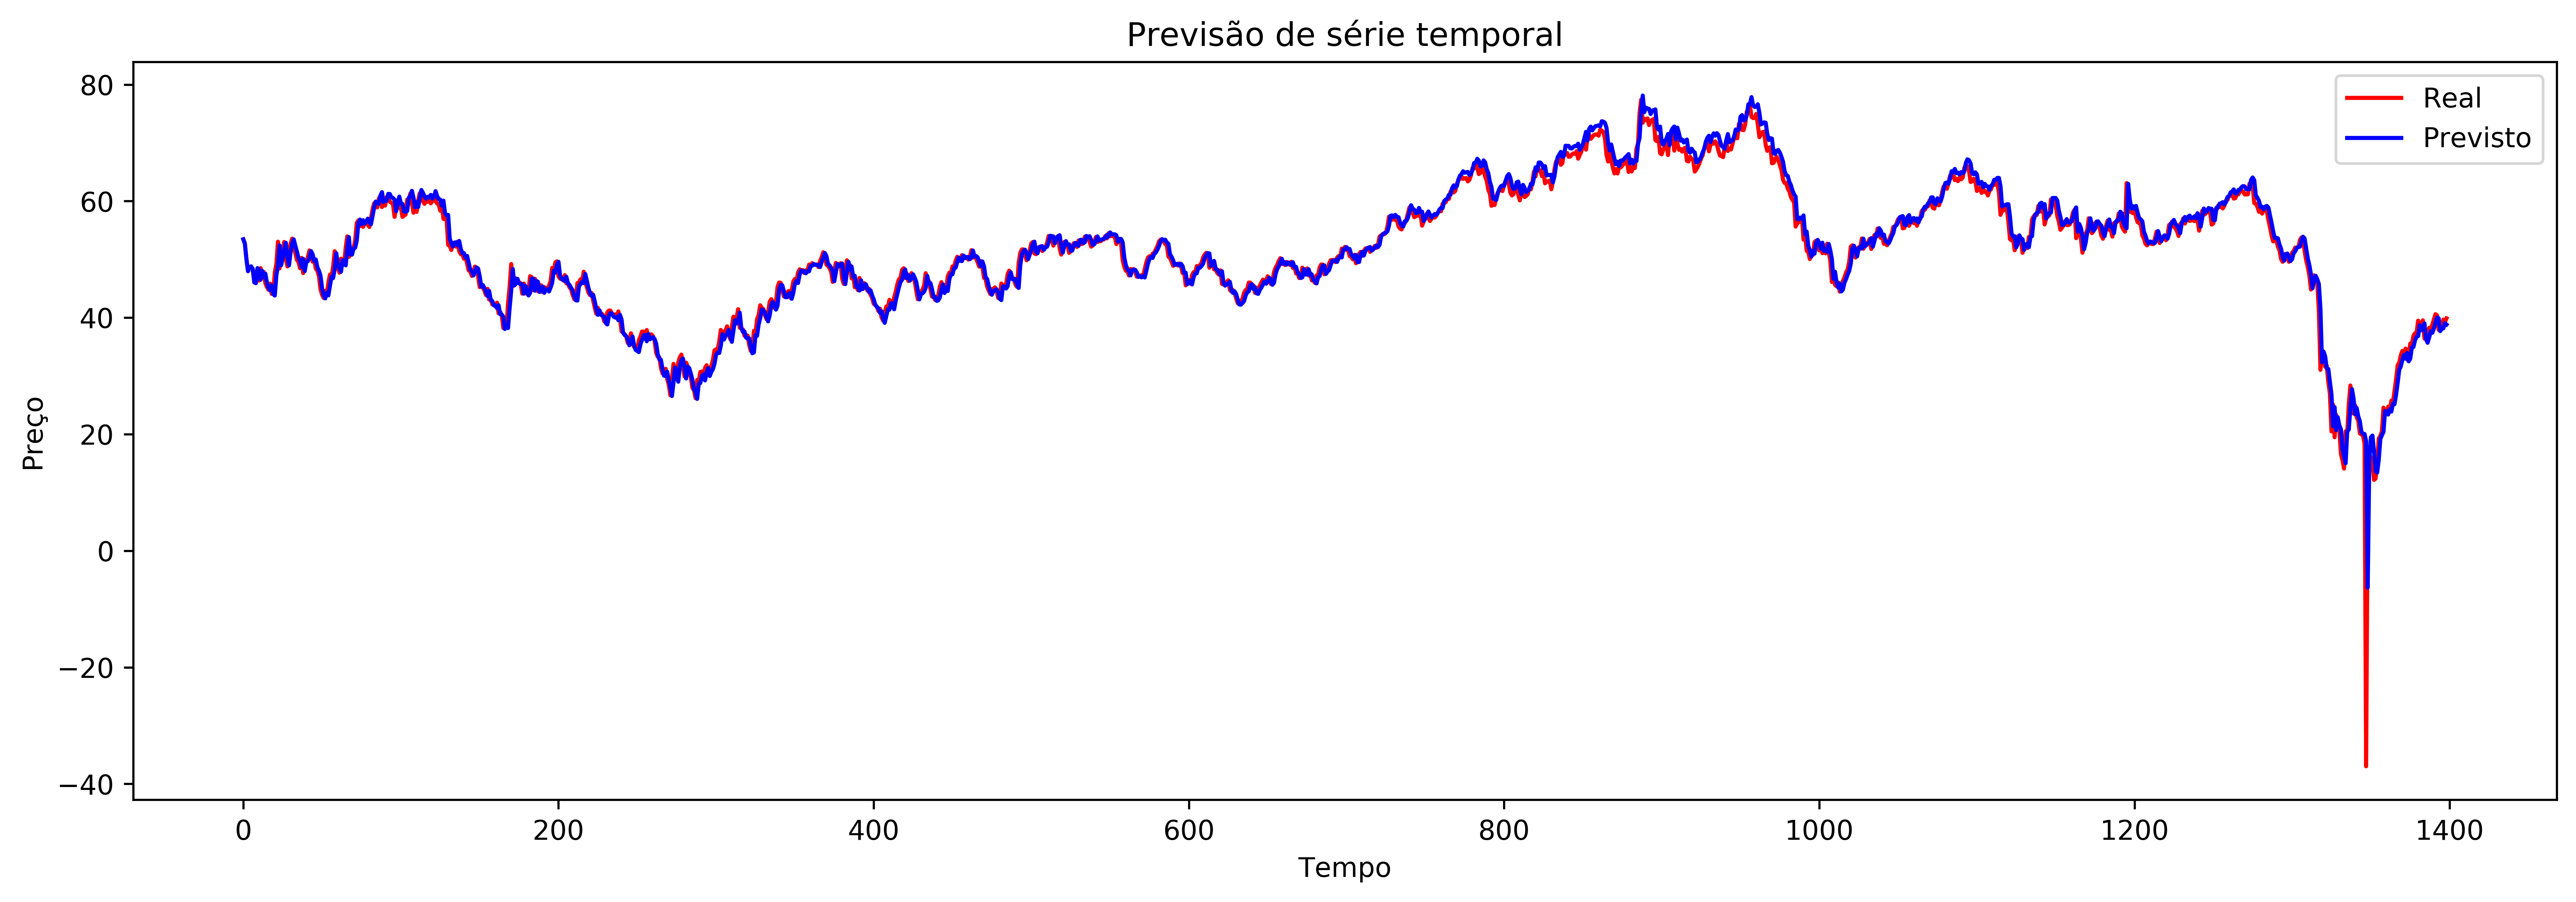

In [38]:
plt.figure(figsize=(16,5), dpi=600)
plt.plot(allTargetData, color = 'red', label = 'Real')
plt.plot(allForecastedData, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

### Metricas de avaliação

In [39]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test, predicted_stock_price))
print('RMSE: ', rmse)

RMSE:  3.5507647576106085


In [40]:
mse = mean_squared_error(test, predicted_stock_price)
print('MSE: ',mse)

MSE:  12.607930363889523


In [41]:
mape = np.mean(np.abs((test - predicted_stock_price) / test)) * 100
print('MAPE: ',mape)

MAPE:  Value    4.185499
dtype: float64
